In [1]:
import pandas as pd
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def seqDist(s1, s2):
    return sum([1 if b1 != b2 else 0 for b1, b2 in zip(s1, s2)])

In [3]:
df = pd.read_csv('/home/jardic/Documents/projects/jk/datasets/datasets_prepped/strc_km.csv', usecols=['varseq', 'cpm'])
df_peaks = pd.read_csv('/home/jardic/Documents/projects/jk/analysis/fitness_lanscape_eda/isolation_vs_enrichment/df_fitness_peaks_2peaks.csv', index_col=0)

In [4]:
peak1 = df_peaks.iloc[0]['varseq']
peak2 = df_peaks.iloc[1]['varseq']

In [5]:
df['peak1_dist'] = [seqDist(s, peak1) for s in df['varseq']]
df['peak2_dist'] = [seqDist(s, peak2) for s in df['varseq']]

In [6]:
test_count = 100

In [7]:
df['fold'] = ['tst' for x in range(0, test_count)] + ['trn' for x in range(0, (len(df) - test_count))]

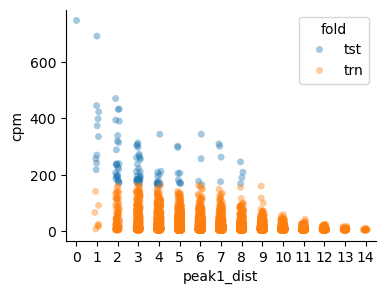

In [8]:
plt.figure(figsize=(4, 3))
sns.stripplot(data=df[df['cpm'] > 5], x='peak1_dist', y='cpm', hue='fold', alpha=0.4, s=5)
sns.despine()

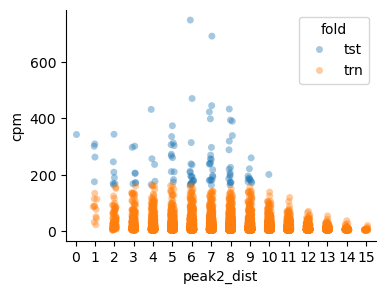

In [9]:
plt.figure(figsize=(4, 3))
sns.stripplot(data=df[df['cpm'] > 5], x='peak2_dist', y='cpm', hue='fold', alpha=0.4, s=5)
sns.despine()

In [10]:
#samplings = [1/x for x in [2, 4, 8, 16]]
#samplings

In [11]:
samplings = [1, 0.1, 0.01, 0.001]

In [12]:
splits = {
    'tst' : df[df['fold'] == 'tst'].index.tolist(),
    'val' : df[df['fold'] == 'val'].index.tolist(),
    'trn' : []
}

In [13]:
df_trn = df[df['fold'] == 'trn']

In [14]:
for s in samplings:
    splits['trn'].append(df_trn.sample(frac=s).index.tolist())

In [15]:
with open('splits.pkl', mode='wb') as sf:
    pickle.dump(splits, sf)